# lab-handling-data-imbalance-classification


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
#Uploading files
numerical = pd.read_csv('numerical.csv')
numerical

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0          0  60.000000       5        9    0         0       39        34   
1          1  46.000000       6        9   16         0       15        55   
2          1  61.611649       3        1    2         0       20        29   
3          0  70.000000       1        4    2         0       23        14   
4          0  78.000000       3        2   60         1       28         9   
...      ...        ...     ...      ...  ...       ...      ...       ...   
95407      1  61.611649       5        9    0        14       36        47   
95408      1  48.000000       7        9    1         0       31        43   
95409      1  60.000000       5        9    0         0       18        46   
95410      0  58.000000       7        9    0         0       28        35   
95411      2  80.000000       5        8    3         1       33        22   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0            18        10         2       1        5     992     264     332   
1            11         6         2       1        9    3611     940     998   
2            33         6         8       1        1    7001    2040    2669   
3            31         3         0       3        0     640     160     219   
4            53        26         3       2        9    2520     627     761   
...         ...       ...       ...     ...      ...     ...     ...     ...   
95407        11         7         8      13        9   27380    7252   10037   
95408        19         4         1       0        9    1254     322     361   
95409        20         7        23       0        9     552     131     205   
95410        20         9         1       1        7    1746     432     508   
95411        27         8        10       3        8    3935    1192    1342   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
0            0       35       65       47       53    92     1     0     0   
1           99        0        0       50       50    67     0     0    31   
2            0        2       98       49       51    96     2     0     0   
3            0        8       92       54       46    61     0     0    11   
4           99        0        0       46       54     2    98     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95407       99        0        0       50       50    78    10     6     4   
95408       96        0        4       51       49    91     3     0     2   
95409       99        0        0       53       47    82    14     0     1   
95410       99        0        0       47       53    92     1     1     5   
95411       99        0        0       48       52    86    12     0     1   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
0        11     0     0     0     0      0      0      0     11      0      0   
1         6     4     2     6     4     14      0      0      2      0      1   
2         2     0     0     0     0      0      0      0      2      0      0   
3        32     6     2     0     0      0      0      0     31      0      0   
4         1     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95407     5     0     0     0     1      1      0      0      3      1      0   
95408     6     1     0     1     0      0      0      0      5      0      0   
95409     9     0     0     0     0      0      0      0      9      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   
95411     1     0     0     0     0      0      0      0      0      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
0          0      39      48      51      40      50      54      25     31   
1          4      34      41      43     

In [3]:
#Uploading files
categorical = pd.read_csv('categorical.csv')
categorical

STATE  CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2  \
0         IL       36        H      F         3      L      E        C   
1         CA       14        H      M         3      L      G        A   
2         NC       43        U      M         3      L      E        C   
3         CA       44        U      F         3      L      E        C   
4         FL       16        H      F         3      L      F        A   
...      ...      ...      ...    ...       ...    ...    ...      ...   
95407  other       27        H      M         3      L      G        C   
95408     TX       24        H      M         3      L      F        A   
95409     MI       30        H      M         3      L      E        B   
95410     CA       24        H      F         2      L      F        A   
95411     NC       24        U      F         3      L      G        C   

      DOMAIN_A  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
0            T         2         89          1      37      12           92   
1            S         1         94          1      52       2           93   
2            R         2         90          1       0       2           91   
3            R         2         87          1      28       1           87   
4            S         2         86          1      20       1           93   
...        ...       ...        ...        ...     ...     ...          ...   
95407        C         2         96          1       0       2           96   
95408        C         1         96          1      50       1           96   
95409        C         3         95          1      38       1           96   
95410        C         1         86          1      40       5           90   
95411        C         1         88          1      18       1           88   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
0                8           94            2           95           12   
1               10           95           12           95           12   
2               11           92            7           95           12   
3               11           94           11           95           12   
4               10           96            1           96            1   
...            ...          ...          ...          ...          ...   
95407            2           96            2           96            2   
95408            3           96            3           96            3   
95409            3           95            1           96           10   
95410           11           96            8           97            1   
95411           12           93           12           96           12   

       FIRSTDATE_YR  FIRSTDATE_MM  
0                89            11  
1                93            10  
2                90             1  
3                87             2  
4                79             3  
...             ...           ...  
95407            96             2  
95408            96             3  
95409            94            10  
95410            86            12  
95411            88             3  

[95412 rows x 22 columns]

In [4]:
#Uploading files
target = pd.read_csv('target.csv')
target

TARGET_B  TARGET_D
0             0       0.0
1             0       0.0
2             0       0.0
3             0       0.0
4             0       0.0
...         ...       ...
95407         0       0.0
95408         0       0.0
95409         0       0.0
95410         1      18.0
95411         0       0.0

[95412 rows x 2 columns]

In [5]:
#Checking if there are any objects in the numerical df (No there is not)
numerical.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[95412 rows x 0 columns]

In [6]:
#Checking types of dtypes of categorical (NOTE: I may want to change some of them into string later...)
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [7]:
#Converting all categoricals in object dtypes
categorical = categorical.applymap(str)

In [8]:
#Checking their types
categorical.dtypes

STATE           object
CLUSTER         object
HOMEOWNR        object
GENDER          object
DATASRCE        object
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B        object
ODATEW_YR       object
ODATEW_MM       object
DOB_YR          object
DOB_MM          object
MINRDATE_YR     object
MINRDATE_MM     object
MAXRDATE_YR     object
MAXRDATE_MM     object
LASTDATE_YR     object
LASTDATE_MM     object
FIRSTDATE_YR    object
FIRSTDATE_MM    object
dtype: object

### `Modeling the data`

In [9]:
#Concatenating numerical and categorical and defining it as X
X = pd.concat([numerical, categorical], axis=1)
X

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0          0  60.000000       5        9    0         0       39        34   
1          1  46.000000       6        9   16         0       15        55   
2          1  61.611649       3        1    2         0       20        29   
3          0  70.000000       1        4    2         0       23        14   
4          0  78.000000       3        2   60         1       28         9   
...      ...        ...     ...      ...  ...       ...      ...       ...   
95407      1  61.611649       5        9    0        14       36        47   
95408      1  48.000000       7        9    1         0       31        43   
95409      1  60.000000       5        9    0         0       18        46   
95410      0  58.000000       7        9    0         0       28        35   
95411      2  80.000000       5        8    3         1       33        22   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0            18        10         2       1        5     992     264     332   
1            11         6         2       1        9    3611     940     998   
2            33         6         8       1        1    7001    2040    2669   
3            31         3         0       3        0     640     160     219   
4            53        26         3       2        9    2520     627     761   
...         ...       ...       ...     ...      ...     ...     ...     ...   
95407        11         7         8      13        9   27380    7252   10037   
95408        19         4         1       0        9    1254     322     361   
95409        20         7        23       0        9     552     131     205   
95410        20         9         1       1        7    1746     432     508   
95411        27         8        10       3        8    3935    1192    1342   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
0            0       35       65       47       53    92     1     0     0   
1           99        0        0       50       50    67     0     0    31   
2            0        2       98       49       51    96     2     0     0   
3            0        8       92       54       46    61     0     0    11   
4           99        0        0       46       54     2    98     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95407       99        0        0       50       50    78    10     6     4   
95408       96        0        4       51       49    91     3     0     2   
95409       99        0        0       53       47    82    14     0     1   
95410       99        0        0       47       53    92     1     1     5   
95411       99        0        0       48       52    86    12     0     1   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
0        11     0     0     0     0      0      0      0     11      0      0   
1         6     4     2     6     4     14      0      0      2      0      1   
2         2     0     0     0     0      0      0      0      2      0      0   
3        32     6     2     0     0      0      0      0     31      0      0   
4         1     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95407     5     0     0     0     1      1      0      0      3      1      0   
95408     6     1     0     1     0      0      0      0      5      0      0   
95409     9     0     0     0     0      0      0      0      9      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   
95411     1     0     0     0     0      0      0      0      0      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
0          0      39      48      51      40      50      54      25     31   
1          4      34      41      43     

In [10]:
#Defining 'y' with target B
y = target['TARGET_B']
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [11]:
#Splitting the data into a training set and a test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [12]:
#Separating X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
import numpy as np


X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)

In [13]:
# Scaling data for train data. Transforming BOTH X_train_num and X_test_num

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) # ONLY fitting TRAIN
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000000  0.624862  0.666667  1.000000  0.000000  0.000000  0.242424   
1      0.000017  0.680412  0.500000  0.777778  0.004149  0.000000  0.484848   
2      0.000000  0.624862  0.166667  1.000000  0.000000  0.010101  0.282828   
3      0.000017  0.624862  0.666667  1.000000  0.000000  0.030303  0.353535   
4      0.000000  0.762887  0.666667  0.444444  0.041494  0.000000  0.191919   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.000000  0.381443  0.666667  1.000000  0.008299  0.000000  0.292929   
76325  0.000034  0.546392  0.666667  1.000000  0.000000  0.000000  0.333333   
76326  0.000000  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   
76327  0.000017  0.608247  0.500000  1.000000  0.000000  0.000000  0.252525   
76328  0.000483  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.333333  0.272727  0.070707  0.050505  0.068966  1.000000  0.000000   
1      0.141414  0.484848  0.060606  0.010101  0.000000  0.777778  0.008784   
2      0.424242  0.171717  0.030303  0.020202  0.022989  0.888889  0.124923   
3      0.404040  0.242424  0.050505  0.040404  0.114943  1.000000  0.027882   
4      0.484848  0.111111  0.070707  0.161616  0.045977  0.555556  0.060091   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.232323  0.444444  0.090909  0.000000  0.011494  1.000000  0.027132   
76325  0.282828  0.353535  0.040404  0.121212  0.011494  1.000000  0.016190   
76326  0.222222  0.444444  0.060606  0.030303  0.045977  1.000000  0.014194   
76327  0.393939  0.181818  0.020202  0.030303  0.011494  1.000000  0.016373   
76328  0.595960  0.070707  0.030303  0.010101  0.011494  1.000000  0.071043   

         POP902    POP903   POP90C1  POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1      0.010645  0.008982  1.000000  0.00000  0.000000  0.494949  0.515152   
2      0.142388  0.110245  0.888889  0.00000  0.121212  0.494949  0.515152   
3      0.030506  0.031833  1.000000  0.00000  0.000000  0.515152  0.494949   
4      0.014853  0.021185  1.000000  0.00000  0.000000  0.767677  0.242424   
...         ...       ...       ...      ...       ...       ...       ...   
76324  0.033872  0.025054  1.000000  0.00000  0.000000  0.505051  0.505051   
76325  0.019482  0.017795  0.000000  0.00000  1.000000  0.505051  0.505051   
76326  0.012286  0.011694  1.000000  0.00000  0.000000  0.373737  0.636364   
76327  0.018009  0.015112  0.000000  0.40404  0.606061  0.454545  0.555556   
76328  0.083102  0.062170  1.000000  0.00000  0.000000  0.505051  0.505051   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      1.000000  0.000000  0.010101  0.000000  0.020202  0.000000  0.000000   
2      0.969697  0.020202  0.000000  0.020202  0.010101  0.045455  0.000000   
3      0.838384  0.080808  0.010101  0.060606  0.080808  0.000000  0.013889   
4      0.434343  0.555556  0.010101  0.010101  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.989899  0.000000  0.000000  0.010101  0.010101  0.000000  0.000000   
76325  0.838384  0.030303  0.131313  0.000000  0.020202  0.000000  0.000000   
76326  0.969697  0.010101  0.000000  0.020202  0.010101  0.000000  0.013889   
76327  0.747475  0.262626  0.000000  0.000000  0.000000  0.000000  0.000000   
76328  0.969697  0.030303  0.000000  0.010101  0.010101  0.000000  0.000000   

           ETH8      ETH9     ETH10  ETH11  ETH12     ETH13     ETH14  ETH15  \
0      0.000000  0.000000  0.000000    0.0    0.0  0.000000  0.000000    0.0   
1      0.000000  0.000000  0.000000    0.0    0.0  0.010309  0.017

In [14]:
# Scaling data for test data

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000017  0.624862  0.666667  1.000000  0.000000  0.000000  0.414141   
1      0.000000  0.773196  0.000000  1.000000  0.000000  0.000000  0.303030   
2      0.000000  0.463918  0.500000  0.555556  0.033195  0.020202  0.444444   
3      0.000000  0.567010  0.833333  0.666667  0.008299  0.000000  0.393939   
4      0.000000  0.690722  1.000000  0.888889  0.008299  0.000000  0.313131   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000034  0.567010  0.833333  0.888889  0.004149  0.000000  0.242424   
19079  0.000000  0.624862  0.666667  1.000000  0.000000  0.000000  0.212121   
19080  0.000000  0.624862  0.500000  0.666667  0.012448  0.010101  0.202020   
19081  0.000034  0.876289  0.000000  1.000000  0.000000  0.000000  0.090909   
19082  0.000483  0.525773  0.666667  1.000000  0.000000  0.000000  0.323232   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.000000  0.484848  0.161616  0.000000  0.057471  1.000000  0.005086   
1      0.262626  0.333333  0.101010  0.040404  0.034483  0.111111  0.002523   
2      0.313131  0.333333  0.000000  0.070707  0.091954  0.444444  0.007386   
3      0.151515  0.676768  0.060606  0.080808  0.022989  1.000000  0.015643   
4      0.323232  0.272727  0.070707  0.030303  0.011494  0.888889  0.022715   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.434343  0.131313  0.060606  0.030303  0.034483  0.888889  0.024012   
19079  0.272727  0.242424  0.050505  0.010101  0.022989  0.222222  0.004590   
19080  0.191919  0.535354  0.030303  0.101010  0.022989  1.000000  0.042897   
19081  0.222222  0.424242  0.101010  0.121212  0.022989  0.222222  0.103241   
19082  0.393939  0.232323  0.131313  0.080808  0.022989  1.000000  0.011813   

         POP902    POP903   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.003282  0.008276  1.000000  0.000000  0.000000  0.404040  0.606061   
1      0.002483  0.002655  1.000000  0.000000  0.000000  0.454545  0.555556   
2      0.008457  0.007513  1.000000  0.000000  0.000000  0.464646  0.545455   
3      0.017378  0.020422  1.000000  0.000000  0.000000  0.454545  0.555556   
4      0.026971  0.022992  0.000000  0.040404  0.969697  0.525253  0.484848   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.022553  0.015903  1.000000  0.000000  0.000000  0.505051  0.505051   
19079  0.004755  0.004124  0.000000  0.000000  1.000000  0.525253  0.484848   
19080  0.050703  0.044516  0.000000  0.000000  1.000000  0.494949  0.515152   
19081  0.096398  0.071774  0.000000  0.020202  0.989899  0.505051  0.505051   
19082  0.013675  0.011355  0.424242  0.000000  0.585859  0.494949  0.515152   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.989899  0.010101  0.000000  0.010101  0.020202  0.000000  0.000000   
1      0.020202  0.979798  0.010101  0.000000  0.000000  0.000000  0.000000   
2      0.484848  0.515152  0.010101  0.000000  0.010101  0.000000  0.000000   
3      0.949495  0.010101  0.000000  0.030303  0.050505  0.045455  0.013889   
4      1.000000  0.000000  0.000000  0.010101  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.979798  0.000000  0.000000  0.020202  0.020202  0.000000  0.000000   
19079  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19080  0.676768  0.333333  0.000000  0.000000  0.000000  0.000000  0.000000   
19081  0.626263  0.000000  0.000000  0.000000  0.969697  0.000000  0.000000   
19082  0.979798  0.020202  0.000000  0.010101  0.010101  0.000000  0.000000   

       ETH8  ETH9     ETH10  ETH11  ETH12     ETH13  ETH14     ETH15  \
0       0.0   0.0  0.000000    0.0    0.0  0.000000    0.0  0.012346   
1       0.0   0.0  0.000000    0.0    0.0  0.000000    0.0  0.000000  

In [15]:
#OneHotEncoding for train data (categoricals). Encoding first train data
#NOTE: I have added in the encoder (handle_unknown='ignore') since I was getting the following message:
#Found unknown categories ['xx'] in column 11 

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encoded

STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  STATE_MO  STATE_NC  \
0           0.0       1.0       0.0       0.0       0.0       0.0       0.0   
1           0.0       0.0       0.0       0.0       1.0       0.0       0.0   
2           0.0       0.0       0.0       0.0       0.0       1.0       0.0   
3           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
76324       0.0       0.0       1.0       0.0       0.0       0.0       0.0   
76325       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
76326       0.0       0.0       1.0       0.0       0.0       0.0       0.0   
76327       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
76328       0.0       1.0       0.0       0.0       0.0       0.0       0.0   

       STATE_TX  STATE_WA  STATE_WI  STATE_other  CLUSTER_10  CLUSTER_11  \
0           0.0       0.0       0.0          0.0         0.0         0.0   
1           0.0       0.0       0.0          0.0         0.0         0.0   
2           0.0       0.0       0.0          0.0         0.0         0.0   
3           0.0       0.0       0.0          0.0         0.0         1.0   
4           0.0       0.0       0.0          1.0         0.0         0.0   
...         ...       ...       ...          ...         ...         ...   
76324       0.0       0.0       0.0          0.0         0.0         0.0   
76325       0.0       0.0       0.0          1.0         0.0         0.0   
76326       0.0       0.0       0.0          0.0         0.0         0.0   
76327       0.0       0.0       0.0          0.0         0.0         0.0   
76328       0.0       0.0       0.0          0.0         0.0         0.0   

       CLUSTER_12  CLUSTER_13  CLUSTER_14  CLUSTER_15  CLUSTER_16  CLUSTER_17  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         1.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         1.0   
...           ...         ...         ...         ...         ...         ...   
76324         0.0         0.0         1.0         0.0         0.0         0.0   
76325         0.0         0.0         0.0         0.0         0.0         0.0   
76326         0.0         1.0         0.0         0.0         0.0         0.0   
76327         0.0         0.0         0.0         0.0         0.0         0.0   
76328         0.0         0.0         1.0         0.0         0.0         0.0   

       CLUSTER_18  CLUSTER_19  CLUSTER_2  CLUSTER_20  CLUSTER_21  CLUSTER_22  \
0             0.0         0.0        0.0         0.0         0.0         0.0   
1             0.0         0.0        0.0         0.0         0.0         0.0   
2             0.0         0.0        0.0         0.0         0.0         0.0   
3             0.0         0.0        0.0         0.0         0.0         0.0   
4             0.0         0.0        0.0         0.0         0.0         0.0   
...           ...         ...        ...         ...         ...         ...   
76324         0.0         0.0        0.0         0.0         0.0         0.0   
76325         0.0         0.0        0.0         0.0         0.0         0.0   
76326         0.0         0.0        0.0         0.0         0.0         0.0   
76327         0.0         0.0        0.0         0.0         0.0         0.0   
76328         0.0         0.0        0.0         0.0         0.0         0.0   

       CLUSTER_23  CLUSTER_24  CLUSTER_25  CLUSTER_26  CLUSTER_27  CLUSTER_28  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0        

In [16]:
#OneHotEncoding for test data

X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_cat_encoded

C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11, 12, 20] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  STATE_MO  STATE_NC  \
0           1.0       0.0       0.0       0.0       0.0       0.0       0.0   
1           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4           0.0       0.0       0.0       1.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
19078       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
19079       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
19080       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
19081       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
19082       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

       STATE_TX  STATE_WA  STATE_WI  STATE_other  CLUSTER_10  CLUSTER_11  \
0           0.0       0.0       0.0          0.0         0.0         0.0   
1           0.0       0.0       0.0          1.0         0.0         0.0   
2           0.0       0.0       0.0          1.0         0.0         0.0   
3           0.0       0.0       0.0          0.0         0.0         0.0   
4           0.0       0.0       0.0          0.0         0.0         0.0   
...         ...       ...       ...          ...         ...         ...   
19078       0.0       0.0       0.0          1.0         0.0         0.0   
19079       0.0       0.0       0.0          1.0         0.0         0.0   
19080       0.0       0.0       0.0          1.0         0.0         0.0   
19081       1.0       0.0       0.0          0.0         0.0         0.0   
19082       0.0       0.0       0.0          1.0         0.0         0.0   

       CLUSTER_12  CLUSTER_13  CLUSTER_14  CLUSTER_15  CLUSTER_16  CLUSTER_17  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
19078         1.0         0.0         0.0         0.0         0.0         0.0   
19079         0.0         0.0         0.0         0.0         0.0         0.0   
19080         0.0         0.0         0.0         0.0         0.0         0.0   
19081         0.0         0.0         0.0         0.0         0.0         0.0   
19082         0.0         0.0         0.0         0.0         0.0         0.0   

       CLUSTER_18  CLUSTER_19  CLUSTER_2  CLUSTER_20  CLUSTER_21  CLUSTER_22  \
0             0.0         0.0        0.0         0.0         0.0         0.0   
1             0.0         0.0        0.0         0.0         0.0         0.0   
2             0.0         0.0        0.0         0.0         0.0         0.0   
3             0.0         0.0        0.0         0.0         0.0         0.0   
4             0.0         0.0        0.0         0.0         0.0         0.0   
...           ...         ...        ...         ...         ...         ...   
19078         0.0         0.0        0.0         0.0         0.0         0.0   
19079         0.0         0.0        0.0         0.0         0.0         0.0   
19080         0.0         0.0        0.0         0.0         0.0         0.0   
19081         0.0         0.0        0.0         0.0         0.0         0.0   
19082         0.0         0.0        0.0         0.0         0.0         0.0   

       CLUSTER_23  CLUSTER_24  CLUSTER_25  CLUSTER_26  CLUSTER_27  CLUSTER_28  \
0             1.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0        

In [17]:
#And before creating the models, we concatenate the data frames
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encoded], axis=1)
X_train_transformed

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000000  0.624862  0.666667  1.000000  0.000000  0.000000  0.242424   
1      0.000017  0.680412  0.500000  0.777778  0.004149  0.000000  0.484848   
2      0.000000  0.624862  0.166667  1.000000  0.000000  0.010101  0.282828   
3      0.000017  0.624862  0.666667  1.000000  0.000000  0.030303  0.353535   
4      0.000000  0.762887  0.666667  0.444444  0.041494  0.000000  0.191919   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.000000  0.381443  0.666667  1.000000  0.008299  0.000000  0.292929   
76325  0.000034  0.546392  0.666667  1.000000  0.000000  0.000000  0.333333   
76326  0.000000  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   
76327  0.000017  0.608247  0.500000  1.000000  0.000000  0.000000  0.252525   
76328  0.000483  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.333333  0.272727  0.070707  0.050505  0.068966  1.000000  0.000000   
1      0.141414  0.484848  0.060606  0.010101  0.000000  0.777778  0.008784   
2      0.424242  0.171717  0.030303  0.020202  0.022989  0.888889  0.124923   
3      0.404040  0.242424  0.050505  0.040404  0.114943  1.000000  0.027882   
4      0.484848  0.111111  0.070707  0.161616  0.045977  0.555556  0.060091   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.232323  0.444444  0.090909  0.000000  0.011494  1.000000  0.027132   
76325  0.282828  0.353535  0.040404  0.121212  0.011494  1.000000  0.016190   
76326  0.222222  0.444444  0.060606  0.030303  0.045977  1.000000  0.014194   
76327  0.393939  0.181818  0.020202  0.030303  0.011494  1.000000  0.016373   
76328  0.595960  0.070707  0.030303  0.010101  0.011494  1.000000  0.071043   

         POP902    POP903   POP90C1  POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1      0.010645  0.008982  1.000000  0.00000  0.000000  0.494949  0.515152   
2      0.142388  0.110245  0.888889  0.00000  0.121212  0.494949  0.515152   
3      0.030506  0.031833  1.000000  0.00000  0.000000  0.515152  0.494949   
4      0.014853  0.021185  1.000000  0.00000  0.000000  0.767677  0.242424   
...         ...       ...       ...      ...       ...       ...       ...   
76324  0.033872  0.025054  1.000000  0.00000  0.000000  0.505051  0.505051   
76325  0.019482  0.017795  0.000000  0.00000  1.000000  0.505051  0.505051   
76326  0.012286  0.011694  1.000000  0.00000  0.000000  0.373737  0.636364   
76327  0.018009  0.015112  0.000000  0.40404  0.606061  0.454545  0.555556   
76328  0.083102  0.062170  1.000000  0.00000  0.000000  0.505051  0.505051   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      1.000000  0.000000  0.010101  0.000000  0.020202  0.000000  0.000000   
2      0.969697  0.020202  0.000000  0.020202  0.010101  0.045455  0.000000   
3      0.838384  0.080808  0.010101  0.060606  0.080808  0.000000  0.013889   
4      0.434343  0.555556  0.010101  0.010101  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.989899  0.000000  0.000000  0.010101  0.010101  0.000000  0.000000   
76325  0.838384  0.030303  0.131313  0.000000  0.020202  0.000000  0.000000   
76326  0.969697  0.010101  0.000000  0.020202  0.010101  0.000000  0.013889   
76327  0.747475  0.262626  0.000000  0.000000  0.000000  0.000000  0.000000   
76328  0.969697  0.030303  0.000000  0.010101  0.010101  0.000000  0.000000   

           ETH8      ETH9     ETH10  ETH11  ETH12     ETH13     ETH14  ETH15  \
0      0.000000  0.000000  0.000000    0.0    0.0  0.000000  0.000000    0.0   
1      0.000000  0.000000  0.000000    0.0    0.0  0.010309  0.017

In [18]:
#And before creating the models, we concatenate the data frames transformed into an array

# X_train_transformed = np.concatenate([X_train_norm, X_train_cat_encoded], axis=1)
# X_train_transformed

In [19]:
#And before creating the models, we concatenate the data frames
X_test_transformed  = pd.concat([X_test_norm,X_test_cat_encoded], axis=1)
X_test_transformed

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000017  0.624862  0.666667  1.000000  0.000000  0.000000  0.414141   
1      0.000000  0.773196  0.000000  1.000000  0.000000  0.000000  0.303030   
2      0.000000  0.463918  0.500000  0.555556  0.033195  0.020202  0.444444   
3      0.000000  0.567010  0.833333  0.666667  0.008299  0.000000  0.393939   
4      0.000000  0.690722  1.000000  0.888889  0.008299  0.000000  0.313131   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000034  0.567010  0.833333  0.888889  0.004149  0.000000  0.242424   
19079  0.000000  0.624862  0.666667  1.000000  0.000000  0.000000  0.212121   
19080  0.000000  0.624862  0.500000  0.666667  0.012448  0.010101  0.202020   
19081  0.000034  0.876289  0.000000  1.000000  0.000000  0.000000  0.090909   
19082  0.000483  0.525773  0.666667  1.000000  0.000000  0.000000  0.323232   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.000000  0.484848  0.161616  0.000000  0.057471  1.000000  0.005086   
1      0.262626  0.333333  0.101010  0.040404  0.034483  0.111111  0.002523   
2      0.313131  0.333333  0.000000  0.070707  0.091954  0.444444  0.007386   
3      0.151515  0.676768  0.060606  0.080808  0.022989  1.000000  0.015643   
4      0.323232  0.272727  0.070707  0.030303  0.011494  0.888889  0.022715   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.434343  0.131313  0.060606  0.030303  0.034483  0.888889  0.024012   
19079  0.272727  0.242424  0.050505  0.010101  0.022989  0.222222  0.004590   
19080  0.191919  0.535354  0.030303  0.101010  0.022989  1.000000  0.042897   
19081  0.222222  0.424242  0.101010  0.121212  0.022989  0.222222  0.103241   
19082  0.393939  0.232323  0.131313  0.080808  0.022989  1.000000  0.011813   

         POP902    POP903   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.003282  0.008276  1.000000  0.000000  0.000000  0.404040  0.606061   
1      0.002483  0.002655  1.000000  0.000000  0.000000  0.454545  0.555556   
2      0.008457  0.007513  1.000000  0.000000  0.000000  0.464646  0.545455   
3      0.017378  0.020422  1.000000  0.000000  0.000000  0.454545  0.555556   
4      0.026971  0.022992  0.000000  0.040404  0.969697  0.525253  0.484848   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.022553  0.015903  1.000000  0.000000  0.000000  0.505051  0.505051   
19079  0.004755  0.004124  0.000000  0.000000  1.000000  0.525253  0.484848   
19080  0.050703  0.044516  0.000000  0.000000  1.000000  0.494949  0.515152   
19081  0.096398  0.071774  0.000000  0.020202  0.989899  0.505051  0.505051   
19082  0.013675  0.011355  0.424242  0.000000  0.585859  0.494949  0.515152   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.989899  0.010101  0.000000  0.010101  0.020202  0.000000  0.000000   
1      0.020202  0.979798  0.010101  0.000000  0.000000  0.000000  0.000000   
2      0.484848  0.515152  0.010101  0.000000  0.010101  0.000000  0.000000   
3      0.949495  0.010101  0.000000  0.030303  0.050505  0.045455  0.013889   
4      1.000000  0.000000  0.000000  0.010101  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.979798  0.000000  0.000000  0.020202  0.020202  0.000000  0.000000   
19079  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19080  0.676768  0.333333  0.000000  0.000000  0.000000  0.000000  0.000000   
19081  0.626263  0.000000  0.000000  0.000000  0.969697  0.000000  0.000000   
19082  0.979798  0.020202  0.000000  0.010101  0.010101  0.000000  0.000000   

       ETH8  ETH9     ETH10  ETH11  ETH12     ETH13  ETH14     ETH15  \
0       0.0   0.0  0.000000    0.0    0.0  0.000000    0.0  0.012346   
1       0.0   0.0  0.000000    0.0    0.0  0.000000    0.0  0.000000  

In [20]:
#Concatenating test data
# X_test_transformed = np.concatenate([X_test_norm,X_test_cat_encoded], axis=1)
# X_test_transformed

In [21]:
y_train.dtypes

dtype('int64')

In [22]:
# needed because the transformation also reset the index for X_train_transformed
# so we need this for y_test as well...
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [23]:
#Creating a logistic regression model and fitting it in train data
from sklearn.linear_model import LogisticRegression

#Note: To avoid reaching max nb of iterations, I could increase 'max_iter=' or use another solver (solver='saga').
#In this case I have chochosen putting max_iter to 1000 
LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) 
LR.fit(X_train_transformed, y_train)


LogisticRegression(max_iter=1000, random_state=0)

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Building predictions with test data
pred = LR.predict(X_test_transformed)

#Printing precision, recall, and f1 for later analysis

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

#Checking score
LR.score(X_test_transformed, y_test)


precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9503222763716397

array([[18135,     0],
       [  948,     0]], dtype=int64)

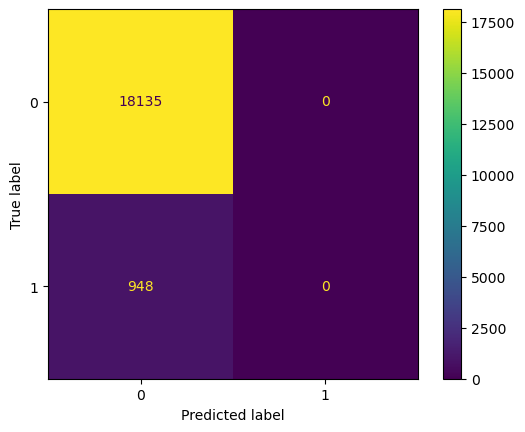

In [25]:
#Plotting it a confusion matrix for later comparissons
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_test,pred)

***First impressions:*** since we are dealing with imbalanced data, this may be a reason why we are not capable of predicting any donors (0 out of the 948). Given this, we proceed to managing the imbalance to check if we can improve this

### `Managing imbalance`

In [26]:
#Managing imbalance in the dataset
#NOTE: for downsampling/upsampling/SMOTE we need both the features and the target in one dataframe (only on training set)
trainset = pd.concat([X_train_transformed, y_train], axis=1)
trainset

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000000  0.624862  0.666667  1.000000  0.000000  0.000000  0.242424   
1      0.000017  0.680412  0.500000  0.777778  0.004149  0.000000  0.484848   
2      0.000000  0.624862  0.166667  1.000000  0.000000  0.010101  0.282828   
3      0.000017  0.624862  0.666667  1.000000  0.000000  0.030303  0.353535   
4      0.000000  0.762887  0.666667  0.444444  0.041494  0.000000  0.191919   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.000000  0.381443  0.666667  1.000000  0.008299  0.000000  0.292929   
76325  0.000034  0.546392  0.666667  1.000000  0.000000  0.000000  0.333333   
76326  0.000000  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   
76327  0.000017  0.608247  0.500000  1.000000  0.000000  0.000000  0.252525   
76328  0.000483  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.333333  0.272727  0.070707  0.050505  0.068966  1.000000  0.000000   
1      0.141414  0.484848  0.060606  0.010101  0.000000  0.777778  0.008784   
2      0.424242  0.171717  0.030303  0.020202  0.022989  0.888889  0.124923   
3      0.404040  0.242424  0.050505  0.040404  0.114943  1.000000  0.027882   
4      0.484848  0.111111  0.070707  0.161616  0.045977  0.555556  0.060091   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.232323  0.444444  0.090909  0.000000  0.011494  1.000000  0.027132   
76325  0.282828  0.353535  0.040404  0.121212  0.011494  1.000000  0.016190   
76326  0.222222  0.444444  0.060606  0.030303  0.045977  1.000000  0.014194   
76327  0.393939  0.181818  0.020202  0.030303  0.011494  1.000000  0.016373   
76328  0.595960  0.070707  0.030303  0.010101  0.011494  1.000000  0.071043   

         POP902    POP903   POP90C1  POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1      0.010645  0.008982  1.000000  0.00000  0.000000  0.494949  0.515152   
2      0.142388  0.110245  0.888889  0.00000  0.121212  0.494949  0.515152   
3      0.030506  0.031833  1.000000  0.00000  0.000000  0.515152  0.494949   
4      0.014853  0.021185  1.000000  0.00000  0.000000  0.767677  0.242424   
...         ...       ...       ...      ...       ...       ...       ...   
76324  0.033872  0.025054  1.000000  0.00000  0.000000  0.505051  0.505051   
76325  0.019482  0.017795  0.000000  0.00000  1.000000  0.505051  0.505051   
76326  0.012286  0.011694  1.000000  0.00000  0.000000  0.373737  0.636364   
76327  0.018009  0.015112  0.000000  0.40404  0.606061  0.454545  0.555556   
76328  0.083102  0.062170  1.000000  0.00000  0.000000  0.505051  0.505051   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      1.000000  0.000000  0.010101  0.000000  0.020202  0.000000  0.000000   
2      0.969697  0.020202  0.000000  0.020202  0.010101  0.045455  0.000000   
3      0.838384  0.080808  0.010101  0.060606  0.080808  0.000000  0.013889   
4      0.434343  0.555556  0.010101  0.010101  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.989899  0.000000  0.000000  0.010101  0.010101  0.000000  0.000000   
76325  0.838384  0.030303  0.131313  0.000000  0.020202  0.000000  0.000000   
76326  0.969697  0.010101  0.000000  0.020202  0.010101  0.000000  0.013889   
76327  0.747475  0.262626  0.000000  0.000000  0.000000  0.000000  0.000000   
76328  0.969697  0.030303  0.000000  0.010101  0.010101  0.000000  0.000000   

           ETH8      ETH9     ETH10  ETH11  ETH12     ETH13     ETH14  ETH15  \
0      0.000000  0.000000  0.000000    0.0    0.0  0.000000  0.000000    0.0   
1      0.000000  0.000000  0.000000    0.0    0.0  0.010309  0.017

In [27]:
trainset['TARGET_B'].value_counts()

TARGET_B
0    72434
1     3895
Name: count, dtype: int64

In [28]:
from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [29]:
category_0

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000000  0.624862  0.666667  1.000000  0.000000  0.000000  0.242424   
1      0.000017  0.680412  0.500000  0.777778  0.004149  0.000000  0.484848   
2      0.000000  0.624862  0.166667  1.000000  0.000000  0.010101  0.282828   
3      0.000017  0.624862  0.666667  1.000000  0.000000  0.030303  0.353535   
4      0.000000  0.762887  0.666667  0.444444  0.041494  0.000000  0.191919   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.000000  0.381443  0.666667  1.000000  0.008299  0.000000  0.292929   
76325  0.000034  0.546392  0.666667  1.000000  0.000000  0.000000  0.333333   
76326  0.000000  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   
76327  0.000017  0.608247  0.500000  1.000000  0.000000  0.000000  0.252525   
76328  0.000483  0.624862  0.666667  1.000000  0.000000  0.010101  0.282828   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.333333  0.272727  0.070707  0.050505  0.068966  1.000000  0.000000   
1      0.141414  0.484848  0.060606  0.010101  0.000000  0.777778  0.008784   
2      0.424242  0.171717  0.030303  0.020202  0.022989  0.888889  0.124923   
3      0.404040  0.242424  0.050505  0.040404  0.114943  1.000000  0.027882   
4      0.484848  0.111111  0.070707  0.161616  0.045977  0.555556  0.060091   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.232323  0.444444  0.090909  0.000000  0.011494  1.000000  0.027132   
76325  0.282828  0.353535  0.040404  0.121212  0.011494  1.000000  0.016190   
76326  0.222222  0.444444  0.060606  0.030303  0.045977  1.000000  0.014194   
76327  0.393939  0.181818  0.020202  0.030303  0.011494  1.000000  0.016373   
76328  0.595960  0.070707  0.030303  0.010101  0.011494  1.000000  0.071043   

         POP902    POP903   POP90C1  POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1      0.010645  0.008982  1.000000  0.00000  0.000000  0.494949  0.515152   
2      0.142388  0.110245  0.888889  0.00000  0.121212  0.494949  0.515152   
3      0.030506  0.031833  1.000000  0.00000  0.000000  0.515152  0.494949   
4      0.014853  0.021185  1.000000  0.00000  0.000000  0.767677  0.242424   
...         ...       ...       ...      ...       ...       ...       ...   
76324  0.033872  0.025054  1.000000  0.00000  0.000000  0.505051  0.505051   
76325  0.019482  0.017795  0.000000  0.00000  1.000000  0.505051  0.505051   
76326  0.012286  0.011694  1.000000  0.00000  0.000000  0.373737  0.636364   
76327  0.018009  0.015112  0.000000  0.40404  0.606061  0.454545  0.555556   
76328  0.083102  0.062170  1.000000  0.00000  0.000000  0.505051  0.505051   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      1.000000  0.000000  0.010101  0.000000  0.020202  0.000000  0.000000   
2      0.969697  0.020202  0.000000  0.020202  0.010101  0.045455  0.000000   
3      0.838384  0.080808  0.010101  0.060606  0.080808  0.000000  0.013889   
4      0.434343  0.555556  0.010101  0.010101  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.989899  0.000000  0.000000  0.010101  0.010101  0.000000  0.000000   
76325  0.838384  0.030303  0.131313  0.000000  0.020202  0.000000  0.000000   
76326  0.969697  0.010101  0.000000  0.020202  0.010101  0.000000  0.013889   
76327  0.747475  0.262626  0.000000  0.000000  0.000000  0.000000  0.000000   
76328  0.969697  0.030303  0.000000  0.010101  0.010101  0.000000  0.000000   

           ETH8      ETH9     ETH10  ETH11  ETH12     ETH13     ETH14  ETH15  \
0      0.000000  0.000000  0.000000    0.0    0.0  0.000000  0.000000    0.0   
1      0.000000  0.000000  0.000000    0.0    0.0  0.010309  0.017

In [30]:
category_1

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
7      0.000000  0.927835  0.166667  0.111111  0.008299       0.0  0.222222   
59     0.000483  0.752577  0.000000  0.777778  0.008299       0.0  0.373737   
68     0.000017  0.624862  0.666667  1.000000  0.000000       0.0  0.161616   
76     0.000017  0.762887  0.666667  1.000000  0.082988       0.0  0.323232   
103    0.000000  0.309278  0.166667  0.333333  0.033195       0.0  0.434343   
...         ...       ...       ...       ...       ...       ...       ...   
76279  0.000000  0.628866  0.833333  0.444444  0.024896       0.0  0.393939   
76308  0.000000  0.587629  0.333333  1.000000  0.000000       0.0  0.424242   
76309  0.000000  0.773196  0.500000  0.777778  0.041494       0.0  0.353535   
76315  0.000000  0.690722  0.166667  0.666667  0.174274       0.0  0.212121   
76320  0.000000  0.624862  0.666667  1.000000  0.000000       0.0  0.000000   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
7      0.454545  0.414141  0.040404  0.131313  0.000000  0.111111  0.013019   
59     0.313131  0.242424  0.090909  0.020202  0.034483  1.000000  0.028561   
68     0.202020  0.272727  0.030303  0.000000  0.000000  1.000000  0.164051   
76     0.404040  0.343434  0.000000  0.020202  0.011494  1.000000  0.025187   
103    0.212121  0.383838  0.030303  0.202020  0.000000  0.333333  0.012290   
...         ...       ...       ...       ...       ...       ...       ...   
76279  0.262626  0.404040  0.050505  0.090909  0.057471  0.444444  0.012209   
76308  0.181818  0.505051  0.070707  0.010101  0.022989  0.222222  0.051317   
76309  0.151515  0.404040  0.070707  0.000000  0.034483  1.000000  0.027305   
76315  0.000000  0.333333  0.121212  0.040404  0.000000  1.000000  0.012249   
76320  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.020030   

         POP902    POP903   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
7      0.012876  0.015903  0.000000  0.787879  0.222222  0.444444  0.565657   
59     0.033030  0.030393  1.000000  0.000000  0.000000  0.505051  0.505051   
68     0.185307  0.146569  1.000000  0.000000  0.010101  0.505051  0.505051   
76     0.030758  0.023360  1.000000  0.000000  0.000000  0.505051  0.505051   
103    0.015148  0.015790  1.000000  0.000000  0.000000  0.464646  0.545455   
...         ...       ...       ...       ...       ...       ...       ...   
76279  0.014811  0.013841  0.000000  1.000000  0.000000  0.464646  0.545455   
76308  0.064167  0.060193  0.000000  0.000000  1.000000  0.494949  0.515152   
76309  0.031936  0.025874  1.000000  0.000000  0.000000  0.494949  0.515152   
76315  0.014685  0.013812  0.000000  0.989899  0.020202  0.474747  0.535354   
76320  0.024825  0.020083  0.757576  0.000000  0.252525  0.505051  0.505051   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
7      0.989899  0.010101  0.000000  0.000000  0.000000  0.000000  0.000000   
59     0.979798  0.010101  0.000000  0.010101  0.060606  0.000000  0.000000   
68     0.818182  0.010101  0.000000  0.151515  0.090909  0.090909  0.013889   
76     0.979798  0.010101  0.000000  0.030303  0.010101  0.045455  0.013889   
103    0.989899  0.010101  0.000000  0.000000  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
76279  0.818182  0.191919  0.000000  0.000000  0.000000  0.000000  0.000000   
76308  1.000000  0.000000  0.010101  0.000000  0.000000  0.000000  0.000000   
76309  0.797980  0.010101  0.000000  0.131313  0.212121  0.000000  0.027778   
76315  0.909091  0.020202  0.000000  0.010101  0.212121  0.000000  0.000000   
76320  0.949495  0.020202  0.010101  0.020202  0.040404  0.000000  0.000000   

           ETH8      ETH9     ETH10    ETH11  ETH12     ETH13     ETH14  \
7      0.000000  0.000000  0.000000  0.00000    0.0  0.000000  0.000000   
59     0.000000  0.000000  0.000000  0.00000    0.0  0.000000  0

In [31]:
#Downsampling (undersampling)
category_0_undersampled = resample(category_0,
                                   replace=False,
                                   n_samples = len(category_1))

In [32]:
print(category_0_undersampled.shape)
print(category_1.shape)


(3895, 632)
(3895, 632)


In [33]:
#We concatenate one on top of the other, and we do randomly order the rows to avoid having all 0s at the top and 1s at the bottom
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0).sample(frac=1)

In [34]:
data_downsampled['TARGET_B'].value_counts()

TARGET_B
0    3895
1    3895
Name: count, dtype: int64

In [35]:
data_downsampled

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
53619  0.000000  0.577320  0.333333  1.000000  0.000000  0.000000  0.242424   
11339  0.000000  0.624862  0.833333  0.555556  0.008299  0.020202  0.333333   
50505  0.000000  0.624862  0.166667  0.666667  0.012448  0.000000  0.383838   
28497  0.000000  0.845361  0.833333  1.000000  0.000000  0.000000  0.292929   
35739  0.000017  0.896907  0.666667  0.444444  0.058091  0.000000  0.313131   
...         ...       ...       ...       ...       ...       ...       ...   
37610  0.000483  0.783505  0.000000  1.000000  0.000000  0.000000  0.323232   
43772  0.000017  0.793814  0.666667  0.111111  0.008299  0.010101  0.474747   
19612  0.000034  0.855670  0.000000  1.000000  0.000000  0.000000  0.323232   
67965  0.000017  0.381443  0.666667  0.888889  0.000000  0.000000  0.242424   
69587  0.000017  0.804124  0.166667  0.000000  0.053942  0.000000  0.575758   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
53619  0.272727  0.434343  0.070707  0.060606  0.022989  0.444444  0.091336   
11339  0.303030  0.373737  0.070707  0.060606  0.034483  0.555556  0.019747   
50505  0.272727  0.464646  0.111111  0.101010  0.057471  0.666667  0.009362   
28497  0.373737  0.282828  0.101010  0.030303  0.022989  1.000000  0.069503   
35739  0.080808  0.484848  0.141414  0.111111  0.022989  1.000000  0.008419   
...         ...       ...       ...       ...       ...       ...       ...   
37610  0.303030  0.333333  0.040404  0.010101  0.022989  0.666667  0.011459   
43772  0.232323  0.494949  0.050505  0.040404  0.045977  0.222222  0.058895   
19612  0.212121  0.474747  0.040404  0.030303  0.011494  1.000000  0.027811   
67965  0.525253  0.191919  0.030303  0.020202  0.034483  0.888889  0.013526   
69587  0.060606  0.949495  0.000000  0.000000  0.000000  0.111111  0.006393   

         POP902    POP903   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
53619  0.099806  0.086603  0.000000  0.626263  0.383838  0.484848  0.525253   
11339  0.022006  0.023868  1.000000  0.000000  0.000000  0.515152  0.494949   
50505  0.010519  0.012005  1.000000  0.000000  0.000000  0.474747  0.535354   
28497  0.079231  0.064486  0.171717  0.000000  0.838384  0.505051  0.505051   
35739  0.009173  0.009801  0.000000  1.000000  0.000000  0.474747  0.535354   
...         ...       ...       ...       ...       ...       ...       ...   
37610  0.014306  0.012061  1.000000  0.000000  0.000000  0.494949  0.515152   
43772  0.076243  0.071689  0.000000  0.000000  1.000000  0.484848  0.525253   
19612  0.033115  0.028585  0.000000  0.000000  1.000000  0.505051  0.505051   
67965  0.015316  0.012485  1.000000  0.000000  0.000000  0.515152  0.494949   
69587  0.009004  0.010762  0.000000  1.000000  0.000000  0.424242  0.585859   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
53619  0.575758  0.424242  0.000000  0.000000  0.010101  0.000000  0.000000   
11339  0.929293  0.010101  0.000000  0.040404  0.101010  0.000000  0.013889   
50505  0.747475  0.020202  0.030303  0.010101  0.313131  0.000000  0.000000   
28497  0.949495  0.010101  0.000000  0.000000  0.222222  0.000000  0.000000   
35739  0.898990  0.030303  0.010101  0.010101  0.151515  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
37610  1.000000  0.000000  0.000000  0.010101  0.000000  0.000000  0.000000   
43772  1.000000  0.000000  0.010101  0.000000  0.010101  0.000000  0.000000   
19612  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
67965  0.989899  0.000000  0.000000  0.010101  0.010101  0.045455  0.000000   
69587  1.000000  0.000000  0.000000  0.000000  0.030303  0.000000  0.000000   

       ETH8      ETH9  ETH10     ETH11  ETH12     ETH13     ETH14  ETH15  \
53619   0.0  0.000000    0.0  0.000000    0.0  0.000000  0.000000    0.0   
11339   0.0  0.029851    0.0  0.000000    0.0  0.072165  0.000

In [36]:
#Splitting X and y
X_down_train = data_downsampled.drop('TARGET_B', axis=1)
y_down_train = data_downsampled['TARGET_B']

In [37]:
y_down_train.dtypes

dtype('int64')

In [38]:
#Checking model with data downsampled data

In [39]:
#Checking model with data downsampled data
LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
LR.fit(X_down_train, y_down_train)
pred = LR.predict(X_test_transformed)

#Printing precision, recall, and f1 for later analysis

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

#Checking score
LR.score(X_test_transformed, y_test)



precision:  0.06592737021691446
recall:  0.570675105485232
f1:  0.11819969412278786


0.577005711890164

array([[10470,  7665],
       [  407,   541]], dtype=int64)

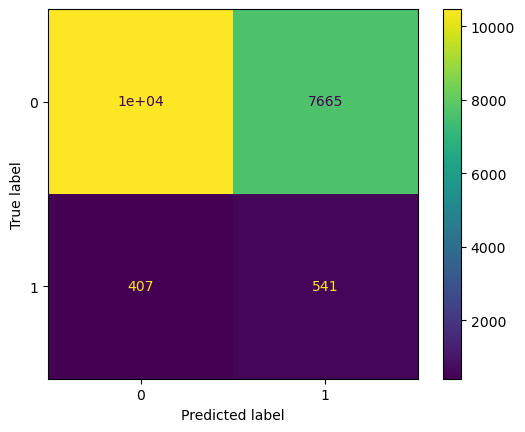

In [40]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_test,pred)

***Conclusion:*** after balancing the data (down_sampling) we are able to correctly predict around 57% of the total donors (541 out of the 948 donors - `Recall score of around 0.57`). Giving this, it is preferred to keep this one as our main model

### `Feature selection`

In [41]:
#Exploring categoricals
for col in categorical.columns:
    print(categorical[col].value_counts())
    print('     ')

STATE
other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: count, dtype: int64
     
CLUSTER
40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: count, dtype: int64
     
HOMEOWNR
H    74582
U    20830
Name: count, dtype: int64
     
GENDER
F        54234
M        39094
other     2084
Name: count, dtype: int64
     
DATASRCE
3  

In [42]:
#Exploring DOB_YR (Date of birth year). Since there 23k rows without a year, we may want to drop this feature
#This because, there is another feature (AGE) in the numerical dataframe that give related information more complete
categorical['DOB_YR'].value_counts()

DOB_YR
0     23661
20     1942
30     1923
48     1912
50     1890
      ...  
7         1
89        1
9         1
85        1
83        1
Name: count, Length: 96, dtype: int64

In [43]:
#Exploring age in numericals (as it is related to DOB_YR)
numerical['AGE'].value_counts(dropna=False)

AGE
61.611649    23665
50.000000     1930
76.000000     1885
72.000000     1813
68.000000     1809
             ...  
9.000000         1
6.000000         1
10.000000        1
8.000000         1
15.000000        1
Name: count, Length: 97, dtype: int64

In [44]:
#Exploring age
numerical['AGE'].isna().sum()

0

In [45]:
#Dropping 'DOB_YR' from categoricals, since we will keep it in numerical
categorical.columns

Index(['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2R',
       'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM',
       'DOB_YR', 'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR',
       'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR',
       'FIRSTDATE_MM'],
      dtype='object')

In [46]:
#Dropping 'DOB_YR' and keeping rest of categoricals from original df
categorical_drop = categorical[['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2R',
       'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM',
       'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR',
       'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR',
       'FIRSTDATE_MM']]
categorical_drop

STATE CLUSTER HOMEOWNR GENDER DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
0         IL      36        H      F        3      L      E        C        T   
1         CA      14        H      M        3      L      G        A        S   
2         NC      43        U      M        3      L      E        C        R   
3         CA      44        U      F        3      L      E        C        R   
4         FL      16        H      F        3      L      F        A        S   
...      ...     ...      ...    ...      ...    ...    ...      ...      ...   
95407  other      27        H      M        3      L      G        C        C   
95408     TX      24        H      M        3      L      F        A        C   
95409     MI      30        H      M        3      L      E        B        C   
95410     CA      24        H      F        2      L      F        A        C   
95411     NC      24        U      F        3      L      G        C        C   

      DOMAIN_B ODATEW_YR ODATEW_MM DOB_MM MINRDATE_YR MINRDATE_MM MAXRDATE_YR  \
0            2        89         1     12          92           8          94   
1            1        94         1      2          93          10          95   
2            2        90         1      2          91          11          92   
3            2        87         1      1          87          11          94   
4            2        86         1      1          93          10          96   
...        ...       ...       ...    ...         ...         ...         ...   
95407        2        96         1      2          96           2          96   
95408        1        96         1      1          96           3          96   
95409        3        95         1      1          96           3          95   
95410        1        86         1      5          90          11          96   
95411        1        88         1      1          88          12          93   

      MAXRDATE_MM LASTDATE_YR LASTDATE_MM FIRSTDATE_YR FIRSTDATE_MM  
0               2          95          12           89           11  
1              12          95          12           93           10  
2               7          95          12           90            1  
3              11          95          12           87            2  
4               1          96           1           79            3  
...           ...         ...         ...          ...          ...  
95407           2          96           2           96            2  
95408           3          96           3           96            3  
95409           1          96          10           94           10  
95410           8          97           1           86           12  
95411          12          96          12           88            3  

[95412 rows x 21 columns]

In [47]:
#Exploring numericals
#Scaling the data with MinMaxScaler to then do feature selection (in this case we will RFE method)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [48]:
#Quickly checking the data in dataframe to check it was scaled
pd.DataFrame(numerical_scaled).head()

0         1         2         3         4         5         6    \
0  0.000000  0.608247  0.666667  1.000000  0.000000  0.000000  0.393939   
1  0.000014  0.463918  0.833333  1.000000  0.066390  0.000000  0.151515   
2  0.000014  0.624862  0.333333  0.111111  0.008299  0.000000  0.202020   
3  0.000000  0.711340  0.000000  0.444444  0.008299  0.000000  0.232323   
4  0.000000  0.793814  0.333333  0.222222  0.248963  0.010101  0.282828   

        7         8         9         10        11        12        13   \
0  0.343434  0.181818  0.101010  0.020202  0.011494  0.555556  0.010051   
1  0.555556  0.111111  0.060606  0.020202  0.011494  1.000000  0.036585   
2  0.292929  0.333333  0.060606  0.080808  0.011494  0.111111  0.070931   
3  0.141414  0.313131  0.030303  0.000000  0.034483  0.000000  0.006484   
4  0.090909  0.535354  0.262626  0.030303  0.022989  1.000000  0.025532   

        14        15   16        17        18        19        20        21   \
0  0.011108  0.009378  0.0  0.353535  0.656566  0.474747  0.535354  0.929293   
1  0.039552  0.028190  1.0  0.000000  0.000000  0.505051  0.505051  0.676768   
2  0.085837  0.075389  0.0  0.020202  0.989899  0.494949  0.515152  0.969697   
3  0.006732  0.006186  0.0  0.080808  0.929293  0.545455  0.464646  0.616162   
4  0.026382  0.021495  1.0  0.000000  0.000000  0.464646  0.545455  0.020202   

        22   23        24        25        26        27        28        29   \
0  0.010101  0.0  0.000000  0.111111  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.0  0.313131  0.060606  0.181818  0.027778  0.060606  0.059701   
2  0.020202  0.0  0.000000  0.020202  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.0  0.111111  0.323232  0.272727  0.027778  0.000000  0.000000   
4  0.989899  0.0  0.000000  0.010101  0.000000  0.000000  0.000000  0.000000   

        30   31   32        33   34        35        36        37        38   \
0  0.000000  0.0  0.0  0.113402  0.0  0.000000  0.000000  0.464286  0.571429   
1  0.304348  0.0  0.0  0.020619  0.0  0.012346  0.046512  0.404762  0.488095   
2  0.000000  0.0  0.0  0.020619  0.0  0.000000  0.000000  0.416667  0.511905   
3  0.000000  0.0  0.0  0.319588  0.0  0.000000  0.011628  0.380952  0.476190   
4  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.392857  0.535714   

        39        40        41        42        43        44        45   \
0  0.607143  0.476190  0.595238  0.642857  0.333333  0.313131  0.424242   
1  0.511905  0.380952  0.500000  0.535714  0.426667  0.333333  0.464646   
2  0.547619  0.440476  0.535714  0.583333  0.306667  0.353535  0.404040   
3  0.523810  0.404762  0.511905  0.559524  0.333333  0.454545  0.353535   
4  0.595238  0.428571  0.547619  0.595238  0.360000  0.343434  0.434343   

        46        47        48        49        50        51        52   \
0  0.272727  0.111111  0.141414  0.181818  0.171717  0.131313  0.111111   
1  0.212121  0.131313  0.141414  0.333333  0.232323  0.101010  0.040404   
2  0.252525  0.131313  0.202020  0.191919  0.161616  0.131313  0.101010   
3  0.202020  0.151515  0.252525  0.171717  0.171717  0.121212  0.070707   
4  0.232323  0.141414  0.212121  0.131313  0.151515  0.202020  0.121212   

        53        54        55        56        57        58        59   \
0  0.151515  0.121212  0.111111  0.343434  0.252525  0.181818  0.262626   
1  0.020202  0.111111  0.161616  0.363636  0.222222  0.151515  0.121212   
2  0.080808  0.151515  0.141414  0.303030  0.222222  0.191919  0.252525   
3  0.070707  0.202020  0.171717  0.303030  0.141414  0.191919  0.252525   
4  0.050505  0.131313  0.151515  0.343434  0.191919  0.191919  0.313131   

        60        61        62        63        64        65        66   \
0  0.101010  0.232323  0.181818  0.333333  0.494949  0.282828  0.121212   
1  0.010101  0.050505  0.040404  0.212121  0.757576  0.555556  0.232323   
2  0.101010  0.232323  0.212121  0.353535  0.444444  0.222222  0.060606   
3  0.11111

In [49]:
#Defining X and y for feature selection
X = numerical_scaled
y = target['TARGET_B']

#Importing libraries
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn import linear_model

#Defining model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=75, verbose=False)
#Fitting it
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=75, verbose=False)

In [50]:
# Get the ranking of features
feature_ranking = rfe.ranking_
feature_ranking


array([  1, 176, 139, 200, 122, 237, 189, 187, 190, 191, 195, 110, 183,
         1,  60,   1,   1,   1,   1,  61,  44,   1,   1, 213,  47, 107,
       156, 155, 102, 106,   1, 105,  46, 108,  62, 109, 241,  88, 231,
        35,  19,   1,   1,  16,  71,  69, 118,  37,  42,  36,  50,  41,
         1, 131,  70,  72,  68,  65,  67, 162,  49,   1,  22,   1,   1,
        13,  23,   1,  52,  51, 132,  31,  91,   1,   1, 164,   1,   1,
         1, 125,  66,   1, 150, 201,  48, 197, 185,  21,  20,   1,   1,
       202,   1, 170, 154,   1, 193,   1,  95,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1, 153, 168, 205, 235, 240, 228, 167,  18,
        17,   1,   1,   1,   1,   1,   1,   1, 127, 173, 126,   1, 144,
       143, 230, 194, 224, 186,  92, 206, 138,  26,   1, 115,  86,  83,
        85,  84,  82,   1, 113,   1,  27, 145, 146, 149, 148, 147,   1,
       112,   1,  45, 221,  81, 207, 169,   1,   1, 136,   4,   2,   1,
         1,   1,   1,  10,   3,   1, 222, 239, 121, 208, 209, 21

In [51]:
#Inserting them into a data frame to check the ranking
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = numerical.columns
top_20 = df[df['Rank']<20]
top_20

Rank Column_name
0       1       TCODE
13      1      POP901
15      1      POP903
16      1     POP90C1
17      1     POP90C2
..    ...         ...
305     1    CARDGIFT
306     1    MINRAMNT
307     1    MAXRAMNT
308     1    LASTGIFT
310     1     AVGGIFT

[93 rows x 2 columns]

In [52]:
#Sorting the scores and printing only first 60
top_20.sort_values(by = ['Rank'], ascending = True).head(60)

Rank Column_name
0       1       TCODE
168     1        TPE3
164     1         MC2
163     1         MC1
157     1        IC22
155     1        IC20
148     1        IC13
146     1        IC11
139     1         IC4
128     1       HUPA7
124     1       HUPA3
123     1       HUPA2
308     1    LASTGIFT
121     1        RHP4
120     1        RHP3
119     1        RHP2
169     1        TPE4
170     1        TPE5
171     1        TPE6
174     1        TPE9
307     1    MAXRAMNT
306     1    MINRAMNT
305     1    CARDGIFT
304     1    NGIFTALL
303     1    RAMNTALL
261     1       ANC12
235     1        SEC1
118     1        RHP1
220     1       OEDC1
200     1       OCC10
199     1        OCC9
197     1        OCC7
196     1        OCC6
194     1        OCC4
193     1        OCC3
191     1        OCC1
202     1       OCC12
108     1       ETHC5
122     1       HUPA1
106     1       ETHC3
73      1        HHP2
67      1        HHN6
107     1       ETHC4
64      1        HHN3
63      1        HHN2
61      1      HHAGE3
52      1       AGEC6
42      1      AGE906
41      1      AGE905
30      1       ETH10
22      1        ETH2
21      1        ETH1
18      1     POP90C3
17      1     POP90C2
16      1     POP90C1
15      1      POP903
13      1      POP901
74      1         DW1
76      1         DW3
310     1     AVGGIFT

In [53]:
top_20.sort_values(by = ['Rank'], ascending = True).tail(34)

Rank Column_name
310     1     AVGGIFT
97      1        HHD6
100     1        HHD9
95      1        HHD4
101     1       HHD10
92      1        HHD1
90      1         HU4
102     1       HHD11
99      1        HHD8
89      1         HU3
104     1       ETHC1
81      1         DW8
105     1       ETHC2
78      1         DW5
77      1         DW4
103     1       HHD12
167     2        TPE2
173     3        TPE8
166     4        TPE1
201     5       OCC11
195     6        OCC5
198     7        OCC8
192     8        OCC2
203     9       OCC13
172    10        TPE7
294    11        HC21
297    12         AC1
65     13        HHN4
182    14        LFC2
184    15        LFC4
43     16      AGE907
117    17        HUR2
116    18        HUR1
40     19      AGE904

In [54]:
#Selecting first 25 columns names to create a corr matrix
cols = top_20.sort_values(by = ['Rank'], ascending = True).head(25)['Column_name']
list(cols)

['TCODE',
 'TPE3',
 'MC2',
 'MC1',
 'IC22',
 'IC20',
 'IC13',
 'IC11',
 'IC4',
 'HUPA7',
 'HUPA3',
 'HUPA2',
 'LASTGIFT',
 'RHP4',
 'RHP3',
 'RHP2',
 'TPE4',
 'TPE5',
 'TPE6',
 'TPE9',
 'MAXRAMNT',
 'MINRAMNT',
 'CARDGIFT',
 'NGIFTALL',
 'RAMNTALL']

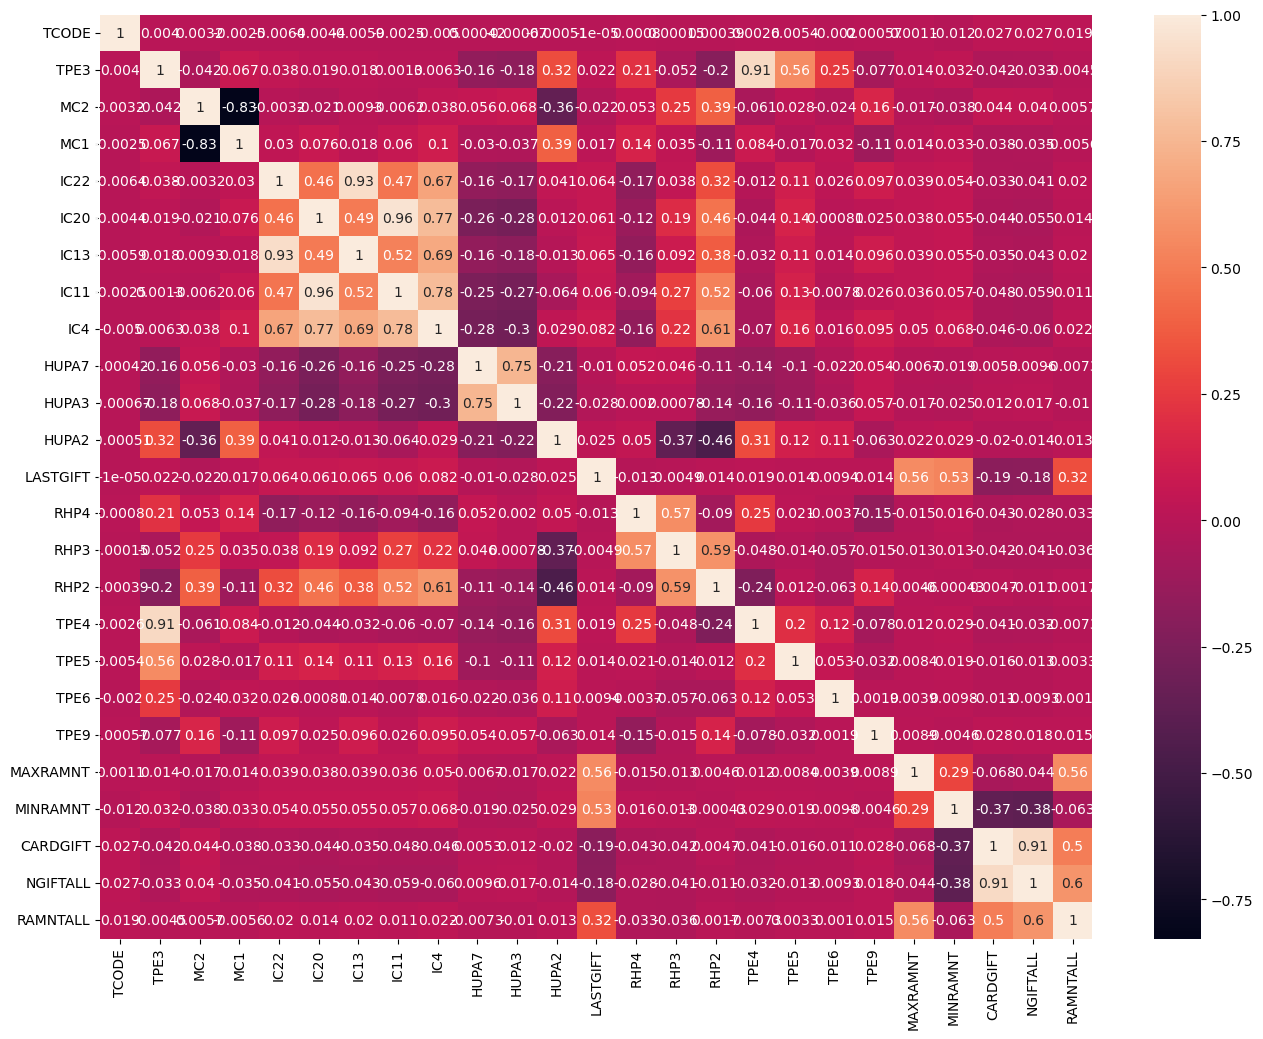

In [55]:
#Checking multiculliniliarity since it seems some columns are repetitive
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=numerical[cols].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [56]:
#After checking the columns with multicolinearity, out of the 25 features I selected to keep, I will also drop the following 4 features
# TPE3 >0.85['TPE4']
# IC22>0.85 ['IC13']
# IC20>0.85 ['IC11']
# CARDGIFT >0.85 ['NGIFTALL']

In [57]:
#Out of the initial 315 columns, I will keep the following 22 features (including AGE as specified above)
numerical_drop = numerical[['TCODE',
 'TPE3',
 'MC2',
 'MC1',
 'IC22',
 'IC20',
 'IC4',
 'HUPA7',
 'HUPA3',
 'HUPA2',
 'LASTGIFT',
 'RHP4',
 'RHP3',
 'RHP2',
 'TPE5',
 'TPE6',
 'TPE9',
 'MAXRAMNT',
 'MINRAMNT',
 'CARDGIFT',
 'RAMNTALL','AGE']]
#Checking again numerical df with 22 columns
numerical_drop

TCODE  TPE3  MC2  MC1  IC22  IC20   IC4  HUPA7  HUPA3  HUPA2  LASTGIFT  \
0          0     0   54   46     0     2   378      0      0      0      10.0   
1          1     0   44   56    10    14  1037      0      0      0      25.0   
2          1     0   62   38     0     2   340      6     24      2       5.0   
3          0     0   54   46     0     6   423      5      9      0      10.0   
4          0     1   80   20     0     5   321      0      0      0      15.0   
...      ...   ...  ...  ...   ...   ...   ...    ...    ...    ...       ...   
95407      1     2   37   63     2    16   535      3     13      8      25.0   
95408      1     4   17   83     3    35   849      5     10      0      20.0   
95409      1     0   57   43     0     0   345      0      0      0      10.0   
95410      0     0   57   43     3    13   556      0      0      0      18.0   
95411      2     1   34   66     1     9   519      0      1      0     100.0   

       RHP4  RHP3  RHP2  TPE5  TPE6  TPE9  MAXRAMNT  MINRAMNT  CARDGIFT  \
0         4    15    61     0     0     4      12.0       5.0        14   
1         5    21    73     0     0     6      25.0      10.0         1   
2         5    14    51     0     0     2      16.0       2.0        14   
3         5    15    50     0     0     0      11.0       2.0         7   
4         6    16    53     0     0     1      15.0       3.0         8   
...     ...   ...   ...   ...   ...   ...       ...       ...       ...   
95407     4    15    53     0     0     2      25.0      25.0         0   
95408     4    20    75     0     0     5      20.0      20.0         0   
95409     5    14    54     0     0     0      10.0       3.0         4   
95410     5    18    68     0     0     6      21.0       5.0        18   
95411     4    16    67     0     0     1     201.0      10.0        11   

       RAMNTALL        AGE  
0         240.0  60.000000  
1          47.0  46.000000  
2         202.0  61.611649  
3         109.0  70.000000  
4         254.0  78.000000  
...         ...        ...  
95407      25.0  61.611649  
95408      20.0  48.000000  
95409      58.0  60.000000  
95410     498.0  58.000000  
95411    3775.0  80.000000  

[95412 rows x 22 columns]

### `Running again the model, now with the features dropped`

In [58]:
#Concatenating numerical and categorical and defining it as X 
X = pd.concat([numerical_drop, categorical_drop], axis=1)
X

TCODE  TPE3  MC2  MC1  IC22  IC20   IC4  HUPA7  HUPA3  HUPA2  LASTGIFT  \
0          0     0   54   46     0     2   378      0      0      0      10.0   
1          1     0   44   56    10    14  1037      0      0      0      25.0   
2          1     0   62   38     0     2   340      6     24      2       5.0   
3          0     0   54   46     0     6   423      5      9      0      10.0   
4          0     1   80   20     0     5   321      0      0      0      15.0   
...      ...   ...  ...  ...   ...   ...   ...    ...    ...    ...       ...   
95407      1     2   37   63     2    16   535      3     13      8      25.0   
95408      1     4   17   83     3    35   849      5     10      0      20.0   
95409      1     0   57   43     0     0   345      0      0      0      10.0   
95410      0     0   57   43     3    13   556      0      0      0      18.0   
95411      2     1   34   66     1     9   519      0      1      0     100.0   

       RHP4  RHP3  RHP2  TPE5  TPE6  TPE9  MAXRAMNT  MINRAMNT  CARDGIFT  \
0         4    15    61     0     0     4      12.0       5.0        14   
1         5    21    73     0     0     6      25.0      10.0         1   
2         5    14    51     0     0     2      16.0       2.0        14   
3         5    15    50     0     0     0      11.0       2.0         7   
4         6    16    53     0     0     1      15.0       3.0         8   
...     ...   ...   ...   ...   ...   ...       ...       ...       ...   
95407     4    15    53     0     0     2      25.0      25.0         0   
95408     4    20    75     0     0     5      20.0      20.0         0   
95409     5    14    54     0     0     0      10.0       3.0         4   
95410     5    18    68     0     0     6      21.0       5.0        18   
95411     4    16    67     0     0     1     201.0      10.0        11   

       RAMNTALL        AGE  STATE CLUSTER HOMEOWNR GENDER DATASRCE RFA_2R  \
0         240.0  60.000000     IL      36        H      F        3      L   
1          47.0  46.000000     CA      14        H      M        3      L   
2         202.0  61.611649     NC      43        U      M        3      L   
3         109.0  70.000000     CA      44        U      F        3      L   
4         254.0  78.000000     FL      16        H      F        3      L   
...         ...        ...    ...     ...      ...    ...      ...    ...   
95407      25.0  61.611649  other      27        H      M        3      L   
95408      20.0  48.000000     TX      24        H      M        3      L   
95409      58.0  60.000000     MI      30        H      M        3      L   
95410     498.0  58.000000     CA      24        H      F        2      L   
95411    3775.0  80.000000     NC      24        U      F        3      L   

      RFA_2A GEOCODE2 DOMAIN_A DOMAIN_B ODATEW_YR ODATEW_MM DOB_MM  \
0          E        C        T        2        89         1     12   
1          G        A        S        1        94         1      2   
2          E        C        R        2        90         1      2   
3          E        C        R        2        87         1      1   
4          F        A        S        2        86         1      1   
...      ...      ...      ...      ...       ...       ...    ...   
95407      G        C        C        2        96         1      2   
95408      F        A        C        1        96         1      1   
95409      E        B        C        3        95         1      1   
95410      F        A        C        1        86         1      5   
95411      G        C        C        1        88         1      1   

      MINRDATE_YR MINRDATE_MM MAXRDATE_YR MAXRDATE_MM LASTDATE_YR LASTDATE_MM  \
0              92           8          94           2          95          12   
1              93          10          95          12          95          12   
2              91          11          92           7          95          12   
3              87          11          94  

In [59]:
#Defining 'y' with target B
y = target['TARGET_B']
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [60]:
#Splitting the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

#Separating X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)

# Scaling data for train data. Transforming BOTH X_train_num and X_test_num

transformer = MinMaxScaler().fit(X_train_num) # ONLY fitting TRAIN
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

# Scaling data for test data

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

#OneHotEncoding for train data (categoricals). Encoding first train data

encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encoded

#OneHotEncoding for test data

X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

#And before creating the models, we concatenate the data frames
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encoded], axis=1)

#And before creating the models, we concatenate the data frames
X_test_transformed  = pd.concat([X_test_norm,X_test_cat_encoded], axis=1)

# needed because the transformation also reset the index for X_train and X_test_transformed
# so we need this for y_test as well...
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [61]:
#Defining model for reduced features
LR_reduced = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) 
LR_reduced.fit(X_train_transformed, y_train)


LogisticRegression(max_iter=1000, random_state=0)

In [62]:
#Building predictions with test data
pred = LR_reduced.predict(X_test_transformed)

#Printing precision, recall, and f1 for later analysis

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

#Checking score
LR_reduced.score(X_test_transformed, y_test)

precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9503222763716397

array([[18135,     0],
       [  948,     0]], dtype=int64)

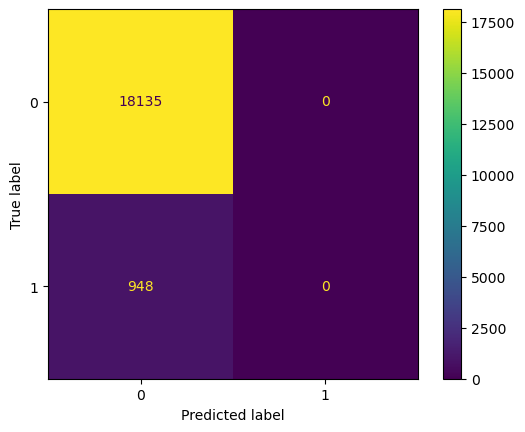

In [63]:
#Plotting it a confusion matrix for later comparissons

cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_test,pred)

### `Managing imbalance again with features dropped, and running model again`

In [64]:
#Managing imbalance in the dataset downsampling
trainset = pd.concat([X_train_transformed, y_train], axis=1)
trainset

TCODE      TPE3       MC2       MC1      IC22      IC20       IC4  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000017  0.010101  0.737374  0.272727  0.000000  0.040404  0.318667   
2      0.000000  0.000000  0.373737  0.636364  0.040404  0.202020  0.524000   
3      0.000017  0.030303  0.444444  0.565657  0.010101  0.121212  0.373333   
4      0.000000  0.000000  0.212121  0.797980  0.000000  0.050505  0.207333   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.000000  0.151515  0.626263  0.383838  0.101010  0.191919  0.624667   
76325  0.000034  0.010101  0.636364  0.373737  0.000000  0.010101  0.139333   
76326  0.000000  0.161616  0.494949  0.515152  0.040404  0.262626  0.640000   
76327  0.000017  0.050505  0.575758  0.434343  0.000000  0.000000  0.143333   
76328  0.000483  0.010101  0.464646  0.545455  0.050505  0.212121  0.536000   

          HUPA7     HUPA3     HUPA2  LASTGIFT   RHP4      RHP3      RHP2  \
0      0.000000  0.000000  0.000000     0.025  0.000  0.000000  0.000000   
1      0.000000  0.000000  0.000000     0.010  0.125  0.245902  0.611111   
2      0.000000  0.000000  0.080808     0.010  0.100  0.295082  0.811111   
3      0.000000  0.000000  0.232323     0.020  0.100  0.213115  0.566667   
4      0.010101  0.020202  0.434343     0.020  0.100  0.180328  0.466667   
...         ...       ...       ...       ...    ...       ...       ...   
76324  0.000000  0.000000  0.000000     0.015  0.100  0.262295  0.844444   
76325  0.040404  0.191919  0.000000     0.020  0.100  0.213115  0.533333   
76326  0.000000  0.000000  0.000000     0.100  0.100  0.213115  0.700000   
76327  0.040404  0.131313  0.010101     0.016  0.125  0.245902  0.544444   
76328  0.000000  0.000000  0.000000     0.020  0.100  0.295082  0.900000   

           TPE5      TPE6      TPE9  MAXRAMNT  MINRAMNT  CARDGIFT  RAMNTALL  \
0      0.000000  0.000000  0.000000  0.005005     0.020  0.048780  0.006441   
1      0.000000  0.000000  0.010101  0.001401     0.005  0.121951  0.009503   
2      0.000000  0.000000  0.040404  0.002002     0.002  0.341463  0.013198   
3      0.014085  0.042553  0.020202  0.003003     0.020  0.024390  0.000634   
4      0.000000  0.000000  0.000000  0.003003     0.010  0.073171  0.004857   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.197183  0.000000  0.040404  0.002002     0.005  0.024390  0.005596   
76325  0.000000  0.000000  0.050505  0.003003     0.020  0.024390  0.000634   
76326  0.225352  0.000000  0.050505  0.039039     0.002  0.170732  0.073171   
76327  0.000000  0.063830  0.030303  0.002202     0.010  0.048780  0.001267   
76328  0.000000  0.000000  0.060606  0.003003     0.007  0.341463  0.015732   

            AGE  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  STATE_MO  \
0      0.624862       0.0       1.0       0.0       0.0       0.0       0.0   
1      0.680412       0.0       0.0       0.0       0.0       1.0       0.0   
2      0.624862       0.0       0.0       0.0       0.0       0.0       1.0   
3      0.624862       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.762887       0.0       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
76324  0.381443       0.0       0.0       1.0       0.0       0.0       0.0   
76325  0.546392       0.0       0.0       0.0       0.0       0.0       0.0   
76326  0.624862       0.0       0.0       1.0       0.0       0.0       0.0   
76327  0.608247       0.0       1.0       0.0       0.0       0.0       0.0   
76328  0.624862       0.0       1.0       0.0       0.0       0.0       0.0   

       STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  CLUSTER_10  \
0           0.0       0.0       0.0       0.0          0.0         0.0   
1           0.0       0.0       0.0       0.0          0.0         0.0   
2           0.0       0.0   

In [65]:
trainset['TARGET_B'].value_counts()

TARGET_B
0    72434
1     3895
Name: count, dtype: int64

In [66]:
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [67]:
#Downsampling (undersampling)
category_0_undersampled = resample(category_0,
                                   replace=False,
                                   n_samples = len(category_1))

print(category_0_undersampled.shape)
print(category_1.shape)

(3895, 245)
(3895, 245)


In [68]:
#We concatenate one on top of the other, and we do randomly order the rows to avoid having all 0s at the top and 1s at the bottom
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0).sample(frac=1)

In [69]:
#Double check counts of TARGET_B
data_downsampled['TARGET_B'].value_counts()

TARGET_B
0    3895
1    3895
Name: count, dtype: int64

In [70]:
data_downsampled

TCODE      TPE3       MC2       MC1      IC22      IC20       IC4  \
40791  0.000017  0.070707  0.626263  0.383838  0.000000  0.090909  0.266667   
54261  0.000069  0.000000  0.505051  0.505051  0.040404  0.202020  0.467333   
57364  0.000017  0.010101  0.555556  0.454545  0.010101  0.131313  0.372667   
7980   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12911  0.000000  0.070707  0.575758  0.434343  0.050505  0.121212  0.353333   
...         ...       ...       ...       ...       ...       ...       ...   
35825  0.000000  0.000000  0.525253  0.484848  0.020202  0.020202  0.238000   
16159  0.000000  0.040404  0.767677  0.242424  0.000000  0.111111  0.333333   
43586  0.000000  0.000000  0.545455  0.464646  0.000000  0.111111  0.378667   
45906  0.000034  0.131313  0.040404  0.969697  0.000000  0.000000  0.152667   
6112   0.000000  0.030303  0.525253  0.484848  0.020202  0.060606  0.299333   

          HUPA7     HUPA3     HUPA2  LASTGIFT   RHP4      RHP3      RHP2  \
40791  0.010101  0.050505  0.020202     0.020  0.125  0.213115  0.577778   
54261  0.000000  0.000000  0.010101     0.035  0.100  0.295082  0.777778   
57364  0.000000  0.010101  0.000000     0.015  0.100  0.245902  0.733333   
7980   0.000000  0.000000  0.000000     0.013  0.000  0.000000  0.000000   
12911  0.000000  0.000000  0.090909     0.025  0.100  0.229508  0.700000   
...         ...       ...       ...       ...    ...       ...       ...   
35825  0.010101  0.131313  0.000000     0.009  0.100  0.229508  0.666667   
16159  0.000000  0.000000  0.000000     0.020  0.125  0.295082  0.722222   
43586  0.000000  0.000000  0.030303     0.015  0.100  0.229508  0.688889   
45906  0.000000  0.000000  0.777778     0.015  0.150  0.196721  0.400000   
6112   0.000000  0.020202  0.101010     0.014  0.100  0.229508  0.633333   

           TPE5  TPE6      TPE9  MAXRAMNT  MINRAMNT  CARDGIFT  RAMNTALL  \
40791  0.000000   0.0  0.010101  0.003003     0.020  0.024390  0.000634   
54261  0.000000   0.0  0.010101  0.006206     0.005  0.097561  0.031148   
57364  0.000000   0.0  0.030303  0.002002     0.003  0.048780  0.002006   
7980   0.000000   0.0  0.000000  0.002002     0.003  0.121951  0.010981   
12911  0.000000   0.0  0.070707  0.004004     0.010  0.048780  0.005913   
...         ...   ...       ...       ...       ...       ...       ...   
35825  0.000000   0.0  0.010101  0.000801     0.005  0.097561  0.003168   
16159  0.056338   0.0  0.000000  0.003003     0.020  0.024390  0.000634   
43586  0.000000   0.0  0.060606  0.002002     0.003  0.073171  0.003379   
45906  0.000000   0.0  0.070707  0.002002     0.005  0.024390  0.004118   
6112   0.000000   0.0  0.030303  0.001802     0.005  0.317073  0.024496   

            AGE  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  STATE_MO  \
40791  0.628866       0.0       0.0       0.0       0.0       0.0       0.0   
54261  0.515464       1.0       0.0       0.0       0.0       0.0       0.0   
57364  0.546392       0.0       1.0       0.0       0.0       0.0       0.0   
7980   0.624862       0.0       0.0       0.0       0.0       0.0       0.0   
12911  0.515464       0.0       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
35825  0.340206       0.0       0.0       0.0       0.0       1.0       0.0   
16159  0.624862       0.0       0.0       1.0       0.0       0.0       0.0   
43586  0.412371       1.0       0.0       0.0       0.0       0.0       0.0   
45906  0.567010       0.0       0.0       1.0       0.0       0.0       0.0   
6112   0.886598       0.0       0.0       0.0       0.0       0.0       0.0   

       STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  CLUSTER_10  \
40791       0.0       0.0       1.0       0.0          0.0         0.0   
54261       0.0       0.0       0.0       0.0          0.0         0.0   
57364       0.0       0.0       0.0       0.0          0.0         0.0   
79

In [71]:
#Splitting X and y
X_down_train = data_downsampled.drop('TARGET_B', axis=1)
y_down_train = data_downsampled['TARGET_B']

In [72]:
#Checking model with data downsampled data

LR_reduced = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) 
LR_reduced.fit(X_down_train, y_down_train)

pred = LR_reduced.predict(X_test_transformed)

#Printing precision, recall, and f1 for later analysis

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

#Checking score
LR_reduced.score(X_test_transformed, y_test)

precision:  0.06704531423632547
recall:  0.5727848101265823
f1:  0.12003979219630817


0.5828224073782948

array([[10579,  7556],
       [  405,   543]], dtype=int64)

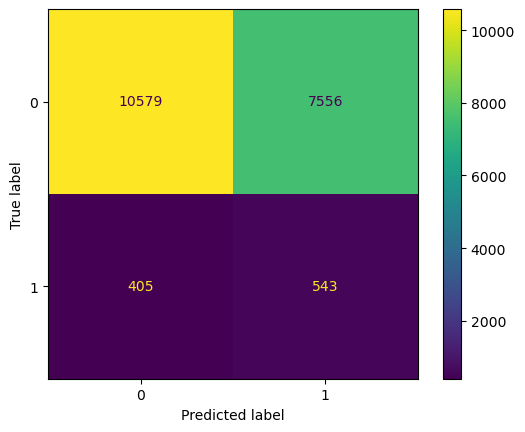

In [73]:
#Checking confusion matrix
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_test,pred)

***Conclusion:*** after balancing the data (down_sampling) we are able to correctly predicting around 57% of the total donors (543 out of the 948 donors). ***Compared to the previous down_sampled model, this one is similar in terms of precision***. My recommendation, if I have the time, would be to redo the feature selection to check if I can improve this last score a bit more

### `Running predictions in all data`

In [74]:
#Splitting all
X_all = X
y_all = y

In [75]:
#Separating X_all into numerical and categorical 

X_all_num = X_all.select_dtypes(include = np.number)
X_all_num

TCODE  TPE3  MC2  MC1  IC22  IC20   IC4  HUPA7  HUPA3  HUPA2  LASTGIFT  \
0          0     0   54   46     0     2   378      0      0      0      10.0   
1          1     0   44   56    10    14  1037      0      0      0      25.0   
2          1     0   62   38     0     2   340      6     24      2       5.0   
3          0     0   54   46     0     6   423      5      9      0      10.0   
4          0     1   80   20     0     5   321      0      0      0      15.0   
...      ...   ...  ...  ...   ...   ...   ...    ...    ...    ...       ...   
95407      1     2   37   63     2    16   535      3     13      8      25.0   
95408      1     4   17   83     3    35   849      5     10      0      20.0   
95409      1     0   57   43     0     0   345      0      0      0      10.0   
95410      0     0   57   43     3    13   556      0      0      0      18.0   
95411      2     1   34   66     1     9   519      0      1      0     100.0   

       RHP4  RHP3  RHP2  TPE5  TPE6  TPE9  MAXRAMNT  MINRAMNT  CARDGIFT  \
0         4    15    61     0     0     4      12.0       5.0        14   
1         5    21    73     0     0     6      25.0      10.0         1   
2         5    14    51     0     0     2      16.0       2.0        14   
3         5    15    50     0     0     0      11.0       2.0         7   
4         6    16    53     0     0     1      15.0       3.0         8   
...     ...   ...   ...   ...   ...   ...       ...       ...       ...   
95407     4    15    53     0     0     2      25.0      25.0         0   
95408     4    20    75     0     0     5      20.0      20.0         0   
95409     5    14    54     0     0     0      10.0       3.0         4   
95410     5    18    68     0     0     6      21.0       5.0        18   
95411     4    16    67     0     0     1     201.0      10.0        11   

       RAMNTALL        AGE  
0         240.0  60.000000  
1          47.0  46.000000  
2         202.0  61.611649  
3         109.0  70.000000  
4         254.0  78.000000  
...         ...        ...  
95407      25.0  61.611649  
95408      20.0  48.000000  
95409      58.0  60.000000  
95410     498.0  58.000000  
95411    3775.0  80.000000  

[95412 rows x 22 columns]

In [76]:
#Separating X_all into numerical and categorical 
X_all_cat = X_all.select_dtypes(include = object)
X_all_cat

STATE CLUSTER HOMEOWNR GENDER DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
0         IL      36        H      F        3      L      E        C        T   
1         CA      14        H      M        3      L      G        A        S   
2         NC      43        U      M        3      L      E        C        R   
3         CA      44        U      F        3      L      E        C        R   
4         FL      16        H      F        3      L      F        A        S   
...      ...     ...      ...    ...      ...    ...    ...      ...      ...   
95407  other      27        H      M        3      L      G        C        C   
95408     TX      24        H      M        3      L      F        A        C   
95409     MI      30        H      M        3      L      E        B        C   
95410     CA      24        H      F        2      L      F        A        C   
95411     NC      24        U      F        3      L      G        C        C   

      DOMAIN_B ODATEW_YR ODATEW_MM DOB_MM MINRDATE_YR MINRDATE_MM MAXRDATE_YR  \
0            2        89         1     12          92           8          94   
1            1        94         1      2          93          10          95   
2            2        90         1      2          91          11          92   
3            2        87         1      1          87          11          94   
4            2        86         1      1          93          10          96   
...        ...       ...       ...    ...         ...         ...         ...   
95407        2        96         1      2          96           2          96   
95408        1        96         1      1          96           3          96   
95409        3        95         1      1          96           3          95   
95410        1        86         1      5          90          11          96   
95411        1        88         1      1          88          12          93   

      MAXRDATE_MM LASTDATE_YR LASTDATE_MM FIRSTDATE_YR FIRSTDATE_MM  
0               2          95          12           89           11  
1              12          95          12           93           10  
2               7          95          12           90            1  
3              11          95          12           87            2  
4               1          96           1           79            3  
...           ...         ...         ...          ...          ...  
95407           2          96           2           96            2  
95408           3          96           3           96            3  
95409           1          96          10           94           10  
95410           8          97           1           86           12  
95411          12          96          12           88            3  

[95412 rows x 21 columns]

In [77]:
# Scaling data for ALL data

X_all_normalized = transformer.transform(X_all_num)
X_all_norm = pd.DataFrame(X_all_normalized, columns=X_all_num.columns)

#OneHotEncoding for ALL data

X_all_cat_encoded = pd.DataFrame(encoder.transform(X_all_cat).toarray(),columns=cols)

#And before run it again in the last model, we concatenate the data frames
X_all_transformed  = pd.concat([X_all_norm,X_all_cat_encoded], axis=1)

# needed because the transformation also reset the index for X_all
# so we need this for y_all as well...

y_all = y_all.reset_index(drop=True) 

C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [78]:
#Printing before calculating scores
y_all

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [79]:
#Building predictions with test data
pred = LR_reduced.predict(X_all_transformed)

#Printing precision, recall, and f1 for later analysis

print("precision: ",precision_score(y_all,pred))
print("recall: ",recall_score(y_all,pred))
print("f1: ",f1_score(y_all,pred))

#Checking score
LR_reduced.score(X_all_transformed, y_all)

precision:  0.07054013875123885
recall:  0.5878587652281644
f1:  0.1259650908125567


0.5859116253720706

array([[53056, 37513],
       [ 1996,  2847]], dtype=int64)

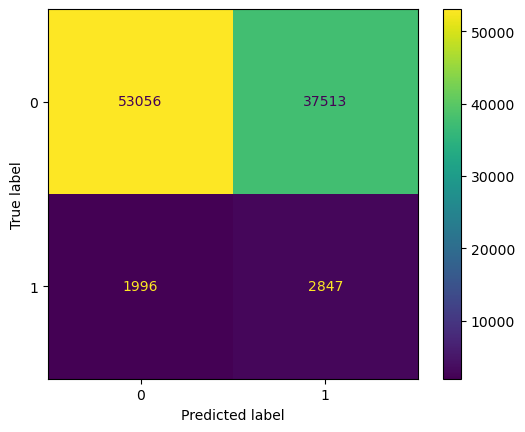

In [80]:
#Plotting it a confusion matrix

cm = confusion_matrix(y_all,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_all,pred)

In [91]:
#Checking mean of value donated from those who made a donation
target = target.loc[(target['TARGET_B']==1)].reset_index(drop=True) 
target
target.loc[:, 'TARGET_D'].mean()

15.624344414619037

***`Conclusion`***: overall, we should be looking to improve our Recall score because the cost of not recieving the donation, is higher than the cost of sending mail to wrong donors 
- Cost of not receiving a donation = #Nb of missing donors * avg donation (1996 * 15.62)
- Cost for sending mail to wrong donors = #Nb of wrong donors * avg cost to send mail (7970*.68)


In [92]:
#Cost of not receiving a donation 
1996 * 15.62

31177.519999999997

In [93]:
#Cost for sending mail to wrong donors
7970*.68

5419.6

### `SAVING dataframes in csv files`

In [81]:
#Printing lenght, data type and predictions of TARGET_B
print(len(pred))
print(type(pred))
pred

95412
<class 'numpy.ndarray'>


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
#Checking type of y_all
type(y_all)

pandas.core.series.Series

In [83]:
#Converting array into a dataframe to then concatenate it withh rest of ALL the data
pred_target_b =pd.DataFrame(pred, columns=['pred_target_b']) 
pred_target_b

pred_target_b
0                  1
1                  0
2                  1
3                  0
4                  0
...              ...
95407              0
95408              1
95409              1
95410              1
95411              1

[95412 rows x 1 columns]

In [84]:
#Concatenating ALL data, with dropped columns, and including predictions of TARGET_B
all_with_pred = pd.concat([X_all, pred_target_b], axis=1)
all_with_pred

TCODE  TPE3  MC2  MC1  IC22  IC20   IC4  HUPA7  HUPA3  HUPA2  LASTGIFT  \
0          0     0   54   46     0     2   378      0      0      0      10.0   
1          1     0   44   56    10    14  1037      0      0      0      25.0   
2          1     0   62   38     0     2   340      6     24      2       5.0   
3          0     0   54   46     0     6   423      5      9      0      10.0   
4          0     1   80   20     0     5   321      0      0      0      15.0   
...      ...   ...  ...  ...   ...   ...   ...    ...    ...    ...       ...   
95407      1     2   37   63     2    16   535      3     13      8      25.0   
95408      1     4   17   83     3    35   849      5     10      0      20.0   
95409      1     0   57   43     0     0   345      0      0      0      10.0   
95410      0     0   57   43     3    13   556      0      0      0      18.0   
95411      2     1   34   66     1     9   519      0      1      0     100.0   

       RHP4  RHP3  RHP2  TPE5  TPE6  TPE9  MAXRAMNT  MINRAMNT  CARDGIFT  \
0         4    15    61     0     0     4      12.0       5.0        14   
1         5    21    73     0     0     6      25.0      10.0         1   
2         5    14    51     0     0     2      16.0       2.0        14   
3         5    15    50     0     0     0      11.0       2.0         7   
4         6    16    53     0     0     1      15.0       3.0         8   
...     ...   ...   ...   ...   ...   ...       ...       ...       ...   
95407     4    15    53     0     0     2      25.0      25.0         0   
95408     4    20    75     0     0     5      20.0      20.0         0   
95409     5    14    54     0     0     0      10.0       3.0         4   
95410     5    18    68     0     0     6      21.0       5.0        18   
95411     4    16    67     0     0     1     201.0      10.0        11   

       RAMNTALL        AGE  STATE CLUSTER HOMEOWNR GENDER DATASRCE RFA_2R  \
0         240.0  60.000000     IL      36        H      F        3      L   
1          47.0  46.000000     CA      14        H      M        3      L   
2         202.0  61.611649     NC      43        U      M        3      L   
3         109.0  70.000000     CA      44        U      F        3      L   
4         254.0  78.000000     FL      16        H      F        3      L   
...         ...        ...    ...     ...      ...    ...      ...    ...   
95407      25.0  61.611649  other      27        H      M        3      L   
95408      20.0  48.000000     TX      24        H      M        3      L   
95409      58.0  60.000000     MI      30        H      M        3      L   
95410     498.0  58.000000     CA      24        H      F        2      L   
95411    3775.0  80.000000     NC      24        U      F        3      L   

      RFA_2A GEOCODE2 DOMAIN_A DOMAIN_B ODATEW_YR ODATEW_MM DOB_MM  \
0          E        C        T        2        89         1     12   
1          G        A        S        1        94         1      2   
2          E        C        R        2        90         1      2   
3          E        C        R        2        87         1      1   
4          F        A        S        2        86         1      1   
...      ...      ...      ...      ...       ...       ...    ...   
95407      G        C        C        2        96         1      2   
95408      F        A        C        1        96         1      1   
95409      E        B        C        3        95         1      1   
95410      F        A        C        1        86         1      5   
95411      G        C        C        1        88         1      1   

      MINRDATE_YR MINRDATE_MM MAXRDATE_YR MAXRDATE_MM LASTDATE_YR LASTDATE_MM  \
0              92           8          94           2          95          12   
1              93          10          95          12          95          12   
2              91          11          92           7          95          12   
3              87          11          94  

In [85]:
#Saving data frame in a new csv file for later
all_with_pred.to_csv('all_with_pred.csv', index=False)

In [86]:
#Concatenating another df with ALL data, ALL original columns, and including predictions of TARGET_B
all_cols_with_pred = pd.concat([numerical, categorical, pred_target_b], axis=1)
all_cols_with_pred

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0          0  60.000000       5        9    0         0       39        34   
1          1  46.000000       6        9   16         0       15        55   
2          1  61.611649       3        1    2         0       20        29   
3          0  70.000000       1        4    2         0       23        14   
4          0  78.000000       3        2   60         1       28         9   
...      ...        ...     ...      ...  ...       ...      ...       ...   
95407      1  61.611649       5        9    0        14       36        47   
95408      1  48.000000       7        9    1         0       31        43   
95409      1  60.000000       5        9    0         0       18        46   
95410      0  58.000000       7        9    0         0       28        35   
95411      2  80.000000       5        8    3         1       33        22   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0            18        10         2       1        5     992     264     332   
1            11         6         2       1        9    3611     940     998   
2            33         6         8       1        1    7001    2040    2669   
3            31         3         0       3        0     640     160     219   
4            53        26         3       2        9    2520     627     761   
...         ...       ...       ...     ...      ...     ...     ...     ...   
95407        11         7         8      13        9   27380    7252   10037   
95408        19         4         1       0        9    1254     322     361   
95409        20         7        23       0        9     552     131     205   
95410        20         9         1       1        7    1746     432     508   
95411        27         8        10       3        8    3935    1192    1342   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
0            0       35       65       47       53    92     1     0     0   
1           99        0        0       50       50    67     0     0    31   
2            0        2       98       49       51    96     2     0     0   
3            0        8       92       54       46    61     0     0    11   
4           99        0        0       46       54     2    98     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95407       99        0        0       50       50    78    10     6     4   
95408       96        0        4       51       49    91     3     0     2   
95409       99        0        0       53       47    82    14     0     1   
95410       99        0        0       47       53    92     1     1     5   
95411       99        0        0       48       52    86    12     0     1   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
0        11     0     0     0     0      0      0      0     11      0      0   
1         6     4     2     6     4     14      0      0      2      0      1   
2         2     0     0     0     0      0      0      0      2      0      0   
3        32     6     2     0     0      0      0      0     31      0      0   
4         1     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95407     5     0     0     0     1      1      0      0      3      1      0   
95408     6     1     0     1     0      0      0      0      5      0      0   
95409     9     0     0     0     0      0      0      0      9      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   
95411     1     0     0     0     0      0      0      0      0      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
0          0      39      48      51      40      50      54      25     31   
1          4      34      41      43     

In [87]:
#Saving data frame in a new csv file for later
all_cols_with_pred.to_csv('all_cols_with_pred.csv', index=False)